# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Example-keras-model" data-toc-modified-id="Example-keras-model-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Example <code>keras</code> model</a></div><div class="lev2 toc-item"><a href="#Simple-as-can-be" data-toc-modified-id="Simple-as-can-be-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Simple as can be</a></div><div class="lev2 toc-item"><a href="#Adding-dropout-for-the-learning-phase" data-toc-modified-id="Adding-dropout-for-the-learning-phase-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Adding dropout for the learning phase</a></div><div class="lev2 toc-item"><a href="#Multilayer-convolutional-neural-network" data-toc-modified-id="Multilayer-convolutional-neural-network-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Multilayer convolutional neural network</a></div><div class="lev3 toc-item"><a href="#Set-up" data-toc-modified-id="Set-up-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Set-up</a></div><div class="lev3 toc-item"><a href="#weight-initialization" data-toc-modified-id="weight-initialization-132"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>weight initialization</a></div><div class="lev3 toc-item"><a href="#Convolution-and-Pooling" data-toc-modified-id="Convolution-and-Pooling-133"><span class="toc-item-num">1.3.3&nbsp;&nbsp;</span>Convolution and Pooling</a></div><div class="lev3 toc-item"><a href="#First-convolutional-layer" data-toc-modified-id="First-convolutional-layer-134"><span class="toc-item-num">1.3.4&nbsp;&nbsp;</span>First convolutional layer</a></div><div class="lev3 toc-item"><a href="#Second-convolutional-layer" data-toc-modified-id="Second-convolutional-layer-135"><span class="toc-item-num">1.3.5&nbsp;&nbsp;</span>Second convolutional layer</a></div><div class="lev3 toc-item"><a href="#Densely-connected-layer" data-toc-modified-id="Densely-connected-layer-136"><span class="toc-item-num">1.3.6&nbsp;&nbsp;</span>Densely connected layer</a></div><div class="lev3 toc-item"><a href="#Dropout-layer" data-toc-modified-id="Dropout-layer-137"><span class="toc-item-num">1.3.7&nbsp;&nbsp;</span>Dropout layer</a></div><div class="lev3 toc-item"><a href="#Readout-layer" data-toc-modified-id="Readout-layer-138"><span class="toc-item-num">1.3.8&nbsp;&nbsp;</span>Readout layer</a></div><div class="lev3 toc-item"><a href="#Setting-up-training" data-toc-modified-id="Setting-up-training-139"><span class="toc-item-num">1.3.9&nbsp;&nbsp;</span>Setting up training</a></div><div class="lev3 toc-item"><a href="#Running-training" data-toc-modified-id="Running-training-1310"><span class="toc-item-num">1.3.10&nbsp;&nbsp;</span>Running training</a></div><div class="lev2 toc-item"><a href="#Multilayer-CNN-with-keras" data-toc-modified-id="Multilayer-CNN-with-keras-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Multilayer CNN with <code>keras</code></a></div><div class="lev3 toc-item"><a href="#Setting-up-data-generation-from-only-1000-images-from-each-class" data-toc-modified-id="Setting-up-data-generation-from-only-1000-images-from-each-class-141"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Setting up data generation from only 1000 images from each class</a></div><div class="lev3 toc-item"><a href="#Setting-up-the-network" data-toc-modified-id="Setting-up-the-network-142"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Setting up the network</a></div><div class="lev3 toc-item"><a href="#Initializing-training" data-toc-modified-id="Initializing-training-143"><span class="toc-item-num">1.4.3&nbsp;&nbsp;</span>Initializing training</a></div><div class="lev1 toc-item"><a href="#Variance-Ratio-for-Active-Learning" data-toc-modified-id="Variance-Ratio-for-Active-Learning-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Variance Ratio for Active Learning</a></div><div class="lev1 toc-item"><a href="#Building-a-network-that-reads-in-images" data-toc-modified-id="Building-a-network-that-reads-in-images-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Building a network that reads in images</a></div>

# Example `keras` model

## Simple as can be
Note that this was taken from the [keras website](https://blog.keras.io/keras-as-a-simplified-interface-to-tensorflow-tutorial.html#calling-keras-layers-on-tensorflow-tensors).

In [1]:
import tensorflow as tf
sess = tf.Session()

In [2]:
from keras import backend as K
K.set_session(sess)

Using TensorFlow backend.


We will use a variable called `img` to store the input images as flat vectors. 

In [3]:
img = tf.placeholder(tf.float32, shape=(None, 784))

Next we construct the network using `keras`

In [4]:
from keras.layers import Dense

In [5]:
x = Dense(128, activation='relu')(img)
x = Dense(128, activation='relu')(x)
preds = Dense(10, activation='softmax')(x)

Next define the placeholder for the labels, and define the loss function

In [6]:
labels = tf.placeholder(tf.float32, shape=(None, 10))

In [7]:
from keras.objectives import categorical_crossentropy

In [8]:
loss = tf.reduce_mean(categorical_crossentropy(labels, preds))

Next, train the model  using a Tensorflow optimizer

In [9]:
from tensorflow.examples.tutorials.mnist import input_data

In [10]:
mnist_data = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [11]:
train_step = tf.train.GradientDescentOptimizer(.5).minimize(loss)

Next, initialize the variables

In [12]:
init_op = tf.global_variables_initializer()
sess.run(init_op)

And then run the training loop

In [13]:
with sess.as_default():
    for j in range(100):
        batch = mnist_data.train.next_batch(50)
        train_step.run(feed_dict={img: batch[0], 
                                  labels: batch[1]})

Now let's evaluate the model

In [14]:
from keras.metrics import categorical_accuracy as accuracy

In [15]:
acc_value = accuracy(labels, preds)
with sess.as_default():
    print(sum(acc_value.eval(feed_dict={img:mnist_data.test.images,
                                        labels:mnist_data.test.labels}))/len(mnist_data.test.images))

0.8742


## Adding dropout for the learning phase

Import packages

In [1]:
import tensorflow as tf
from keras import backend as K

Using TensorFlow backend.


In [2]:
from keras.layers import Dense
from keras.layers import Dropout
from keras.objectives import categorical_crossentropy
from keras.metrics import categorical_accuracy as accuracy

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

Activate/set session: basically, tie the C++ `tensorflow` backend to `keras`.

In [4]:
sess = tf.Session()
K.set_session(sess)

Set input and output variable placeholders

In [5]:
img = tf.placeholder(tf.float32, shape=(None, 784))
labels = tf.placeholder(tf.float32, shape=(None, 10))

Construct network with dropout; will take longer to train but should generalize better.

In [6]:
x = Dense(128, activation='relu')(img)
x = Dropout(.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(.5)(x)
preds = Dense(10, activation='softmax')(x)

Define loss function using categorical cross-entropy

In [7]:
loss = tf.reduce_mean(categorical_crossentropy(labels, preds))

Load in data from file.

In [8]:
from tensorflow.examples.tutorials.mnist import input_data
mnist_data = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Next, train the model  using a Tensorflow optimizer, gradient descent. I cannot figure out if it's doing mini-batch SGD or regular ol' GD

In [9]:
train_step = tf.train.GradientDescentOptimizer(.5).minimize(loss)

Initialize all variables in workspace.

In [10]:
init_op = tf.global_variables_initializer()
sess.run(init_op)

Run the training loop — we are in the *learning phase* so we have to specify this in `feed_dict` so that `tf` and `keras` know how to use the `Dropout` layers.

In [11]:
test_error = []
batch_number = []
num_rounds = 500

In [12]:
acc_value = accuracy(labels, preds)

In [13]:
with sess.as_default():
    for j in range(num_rounds):
        batch = mnist_data.train.next_batch(50)
        train_step.run(feed_dict={img: batch[0], 
                                  labels: batch[1],
                                  K.learning_phase():1})
        if (j%50) == 1:
            batch_number.append(j)
            test_error.append(
                sum(acc_value.eval(feed_dict={img:mnist_data.test.images,
                                              labels: mnist_data.test.labels,
                                              K.learning_phase():0})) /
                mnist_data.test.num_examples)

Append the final test error...

In [14]:
with sess.as_default():
    batch_number.append(num_rounds-1)
    test_error.append(sum(acc_value.eval(feed_dict={img:mnist_data.test.images,
                                                    labels:mnist_data.test.labels,
                                                    K.learning_phase():0})) /
                      mnist_data.test.num_examples)

Plot the resulting accuracy after each recorded batch number

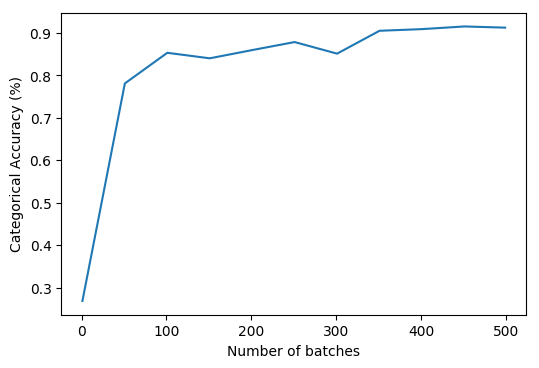

In [15]:
plt.plot(batch_number, test_error);
plt.xlabel('Number of batches')
plt.ylabel('Categorical Accuracy (%)');

## Multilayer convolutional neural network

This is a tutorial from [the tensorflow blog](https://www.tensorflow.org/get_started/mnist/pros#build_a_multilayer_convolutional_network).

### Set-up

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [3]:
x = tf.placeholder(tf.float32, shape=[None, 784])
y_ = tf.placeholder(tf.float32, shape=[None, 10])

### weight initialization

we want to initialize random weights (to avoid zero-gradients and for symmetry breaking) that lie away from zero (to avoid "dead neurons"). define two functions to do this

In [4]:
def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=.1)
    return tf.Variable(initial)

def bias_variable(shape):
    initial = tf.constant(.1, shape=shape)
    return tf.Variable(initial)

### Convolution and Pooling

In [5]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, 
                        strides=[1,1,1,1], 
                        padding='SAME')

def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1,2,2,1], 
                          strides=[1,2,2,1], 
                          padding='SAME')

### First convolutional layer

In [6]:
W_conv1 = weight_variable([5,5,1,32])
b_conv1 = bias_variable([32])

To apply the layer, we first reshape x to a 4d tensor, with the second and third dimensions corresponding to image width and height, and the final dimension corresponding to the number of color channels.

In [7]:
x_image = tf.reshape(x, shape=[-1, 28, 28, 1])

In [8]:
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

### Second convolutional layer

In [9]:
W_conv2 = weight_variable([5,5,32,64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

### Densely connected layer

In [10]:
W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

### Dropout layer

In [11]:
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

### Readout layer

In [12]:
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

### Setting up training

In [13]:
cross_entropy = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y_conv))

train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_, 1))

accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

### Running training

In [15]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for j in range(2000):
        batch = mnist.train.next_batch(50)
        if (j % 100) == 0:
            train_accuracy = accuracy.eval(feed_dict = {x: batch[0], 
                                                        y_:batch[1], 
                                                        keep_prob: 1.0})
            print('step {:d}, training accuracy {:g}'.format(j, train_accuracy))
        train_step.run(feed_dict={x:batch[0], y_:batch[1], keep_prob:.5})
    # done for loop
    print('test accuracy: {:g}'.format(accuracy.eval(feed_dict={x:batch[0], y_:batch[1], keep_prob:1.0})))

step 0, training accuracy 0.12
step 100, training accuracy 0.86
step 200, training accuracy 0.9
step 300, training accuracy 0.92
step 400, training accuracy 1
step 500, training accuracy 0.96
step 600, training accuracy 1
step 700, training accuracy 0.92
step 800, training accuracy 0.98
step 900, training accuracy 1
step 1000, training accuracy 0.98
step 1100, training accuracy 0.98
step 1200, training accuracy 0.98
step 1300, training accuracy 0.98
step 1400, training accuracy 0.96
step 1500, training accuracy 0.98
step 1600, training accuracy 0.98
step 1700, training accuracy 0.94
step 1800, training accuracy 0.96
step 1900, training accuracy 1
test accuracy: 0.98


## Multilayer CNN with `keras`

See [this `keras` blog post](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html) for details

### Setting up data generation from only 1000 images from each class

In [9]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

In [11]:
datagen = ImageDataGenerator(rotation_range=40, 
                             width_shift_range=.2, height_shift_range=.2, 
                             shear_range=.2, zoom_range=.2, 
                             fill_mode='nearest', horizontal_flip=True)

### Setting up the network

In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dense, Dropout, Flatten

In [18]:
model = Sequential()
model.add(Conv2D(32, (3,3), input_shape=(150, 150, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [19]:
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

### Initializing training

In [12]:
batch_size = 16

In [13]:
train_datagen = ImageDataGenerator(rescale=1./255, horizontal_flip=True,
                                   shear_range=0.2,zoom_range=0.2)

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [15]:
train_generator = train_datagen.flow_from_directory(
        'catsdogs/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 2002 images belonging to 2 classes.


In [16]:
validation_generator = test_datagen.flow_from_directory(
        'catsdogs/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')

Found 800 images belonging to 2 classes.


In [20]:
model.fit_generator(
        train_generator,
        steps_per_epoch=2002 // batch_size,
        epochs=50,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)

Epoch 1/50
125/125 [==============================] - 76s - loss: 0.7080 - acc: 0.5400 - val_loss: 0.6669 - val_acc: 0.6025
Epoch 2/50
125/125 [==============================] - 77s - loss: 0.6649 - acc: 0.6075 - val_loss: 0.6875 - val_acc: 0.5988
Epoch 3/50
125/125 [==============================] - 77s - loss: 0.6242 - acc: 0.6560 - val_loss: 0.6516 - val_acc: 0.6212
Epoch 4/50
125/125 [==============================] - 76s - loss: 0.6092 - acc: 0.6845 - val_loss: 0.6076 - val_acc: 0.6787
Epoch 5/50
125/125 [==============================] - 72s - loss: 0.5850 - acc: 0.7125 - val_loss: 0.6130 - val_acc: 0.6775
Epoch 6/50
125/125 [==============================] - 71s - loss: 0.5896 - acc: 0.7010 - val_loss: 0.5668 - val_acc: 0.6937
Epoch 7/50
125/125 [==============================] - 73s - loss: 0.5567 - acc: 0.7215 - val_loss: 0.5816 - val_acc: 0.6863
Epoch 8/50
125/125 [==============================] - 74s - loss: 0.5449 - acc: 0.7295 - val_loss: 0.5370 - val_acc: 0.7100
Epoch 9/

KeyboardInterrupt: 

In [29]:
model.save_weights('first_try.h5')  # always save your weights after training or during training

# Variance Ratio for Active Learning

In [ ]:
from keras.datasets import mnist
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD, Adadelta, Adagrad, Adam
from keras.utils import np_utils, generic_utils

# Building a network that reads in images